# Libraries

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns; sns.set(style="whitegrid")
import statsmodels
import statsmodels.api as sm
import pandas_datareader as pdr
from datetime import datetime
from statsmodels.tsa.stattools import coint, adfuller

## Normal And Lognormal Distribution for Stock Prices


Stock Prices can be modeled using the Lognormal Distribution as long as we 
assume the growth factor to be be distributed normally.
<br>
This also alleviates the problem caused by normal distributions having a negative side as stock prices cannot have negative values.
<br>
Returns are usually assumed to be originating from Normal distribution so our modelling provides us with unique advantages.

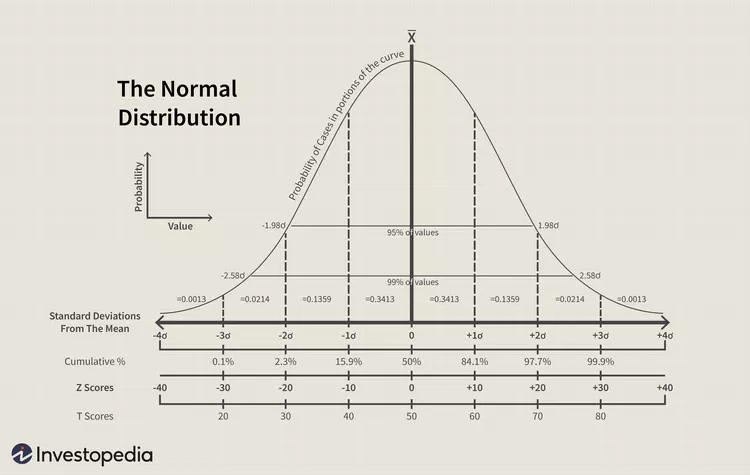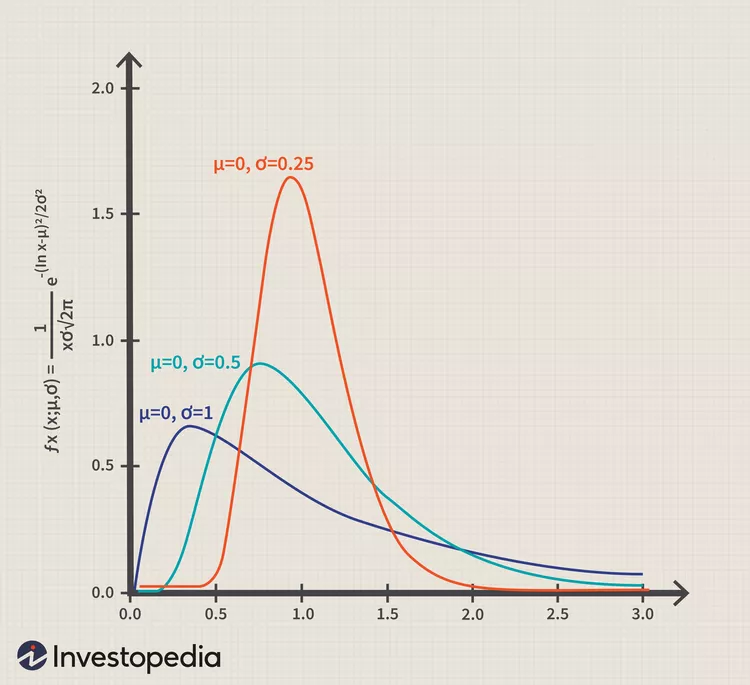

##Random Walk Hypothesis

According to the Random Walk Hypothesis, stock prices evolve according to a geometric random walk. That is,

\begin{align}
  S_t = S_{t-1}(1 + α)
\end{align}

where,
<br>
$S_t$ is the price of a stock at some time $t$ with $t$ being in a the form of some discrete time steps.
<br> 
$α$ is a random variable satisfying $α \sim N(μ, σ^2)$
<br>

This implication of this hypothesis is that stock prices cannot be predicted. To explain this random walk better, we have simulated a geometric random walk in the following section.

Here, error_term corresponds to $α$ which satisfies $α ∼ N(0.05, 0.1)$.
<br>
The walk is initialized with $S_0 = 1$

##Simulating Geometric Random Walk 


In [ ]:
S = np.zeros(100)
S[0] = 1
error_term = np.random.randn(100)* 0.1 + 0.05
for i in range(1, 100):
  S[i] = S[i-1] * (1 + error_term[i])

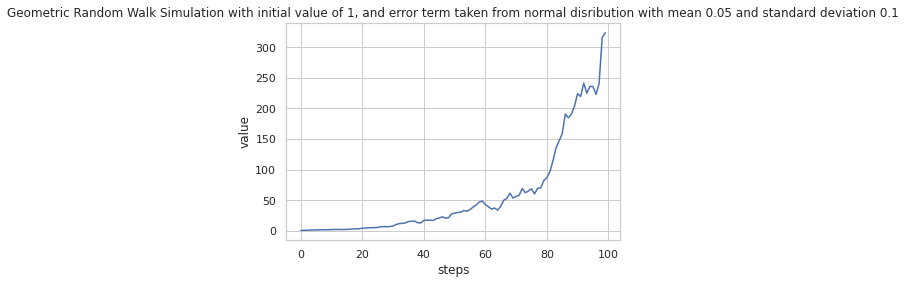

In [ ]:
timestamps = (np.zeros(100).astype(int))
for i in range(100):
  timestamps[i] = i
random_walk_graph = sns.lineplot(x=timestamps, y=S)
random_walk_graph.set(xlabel='steps', ylabel='value')
plt.title("Geometric Random Walk Simulation with initial value of 1, and error term taken from normal disribution with mean 0.05 and standard deviation 0.1")
plt.show()

## Data importing and processing

In [4]:
symbols =  ['TSLA' , 'NFLX' ,'NVDA','AMD' , 'MSFT']
asset_data =  yf.download(symbols, start="2017-03-20" ,end= "2020-03-20")['Adj Close']

asset_data.keys()

[*********************100%***********************]  5 of 5 completed


Index(['AMD', 'MSFT', 'NFLX', 'NVDA', 'TSLA'], dtype='object')

In [5]:
asset_data.head()

,AMD,MSFT,NFLX,NVDA,TSLA
Date,,,,,
2017-03-20,14.40,60.172672,145.830002,27.015360,17.461332
2017-03-21,13.82,59.505413,142.419998,26.141586,16.712000
2017-03-22,14.10,60.265331,142.649994,26.674736,17.000668
2017-03-23,13.79,60.117058,141.839996,26.432846,16.985332
2017-03-24,13.70,60.218998,142.020004,26.526638,17.544001


# Cointegration


### Cointegration is a statistical method used to test the correlation between two or more non-stationary time series in the long run or for a specified period.

## Function for finding cointegration of two time series

In [6]:

def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n,n))
    pvalue_matrix = np.ones((n,n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(n):
            s1 = data[keys[i]]
            s2 = data[keys[j]]
            result = coint(s1,s2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i,j] = score
            pvalue_matrix[i,j] = pvalue
            if (pvalue < 0.05 and pvalue!=0):                #cutoff
                pairs.append((pvalue, (keys[i], keys[j])))
    return score_matrix, pvalue_matrix, pairs


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1605: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  

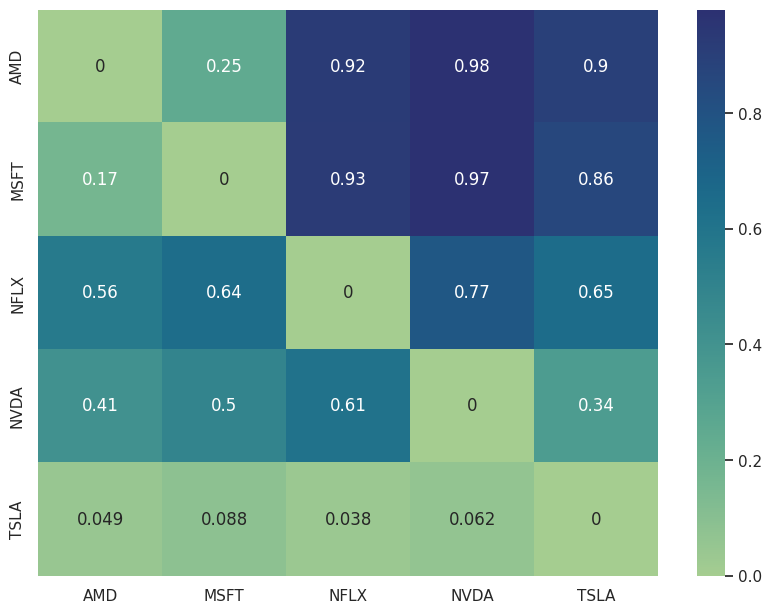

In [7]:
scores, pvalues, pairs = find_cointegrated_pairs(asset_data)
from matplotlib.pyplot import figure
figure(figsize=(10, 7.5), dpi=100)
sns.heatmap(pvalues, xticklabels = asset_data.columns, yticklabels = asset_data.columns,
        cmap = 'crest',  annot = True)


Identifying the pairs of stocks having a co-integrating relationship, i.e, they have p-values less than the defined cutoff of 0.05

In [8]:
pairs

[(0.048748483319394575, ('TSLA', 'AMD')),
 (0.037601130485412575, ('TSLA', 'NFLX'))]

In [9]:

min(pairs)

(0.037601130485412575, ('TSLA', 'NFLX'))

[*********************100%***********************]  5 of 5 completed


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


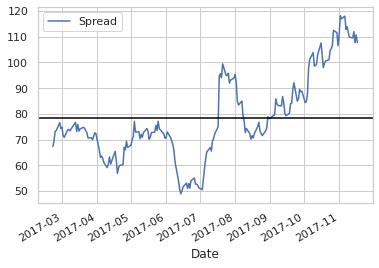

In [15]:
symbols_pairs =  ['TSLA' , 'NFLX']
asset_pairs =  yf.download(symbols, start="2017-02-20" ,end= "2017-11-20")['Adj Close']

S1=asset_pairs['TSLA']
S2=asset_pairs['NFLX']

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['TSLA']
b = results.params['TSLA']

spread = S2 - b * S1
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

In [16]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

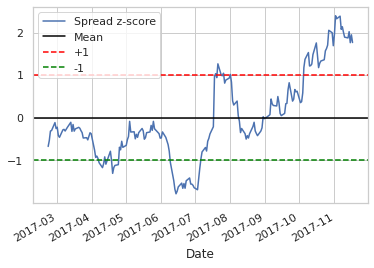

In [17]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

**NORMALIZATION OF STOCK PRICES**

In [ ]:
start_date = '2017-01-01'
end_date = '2017-12-31'

tickers_list = ['TSLA', 'NFLX']

data = pd.DataFrame(columns=tickers_list)

for ticker in tickers_list:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Adj Close']
ratio= data['NFLX']/data['TSLA']
    
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,NFLX
Date,,
2017-01-03,14.466000,127.489998
2017-01-04,15.132667,129.410004
2017-01-05,15.116667,131.809998
2017-01-06,15.267333,131.070007
2017-01-09,15.418667,130.949997


Plotting the stock price ratio for the two stocks

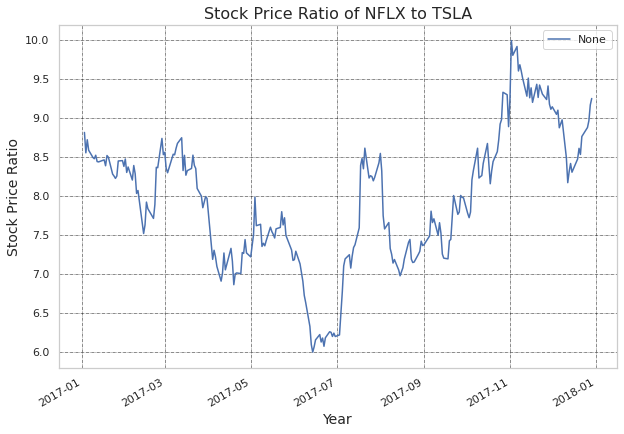

In [ ]:
ratio.plot(figsize=(10, 7))

plt.legend()

plt.title("Stock Price Ratio of NFLX to TSLA", fontsize=16)

plt.ylabel('Stock Price Ratio', fontsize=14)
plt.xlabel('Year', fontsize=14)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. Z-scores also make it possible to adapt scores from data sets having a very different range of values to make scores that can be compared to one another more accurately.

Here, we have used Z-score to perform normalization on the stock price ratio

In [ ]:
z_scores = (ratio - ratio.mean())/ratio.std(ddof=0)

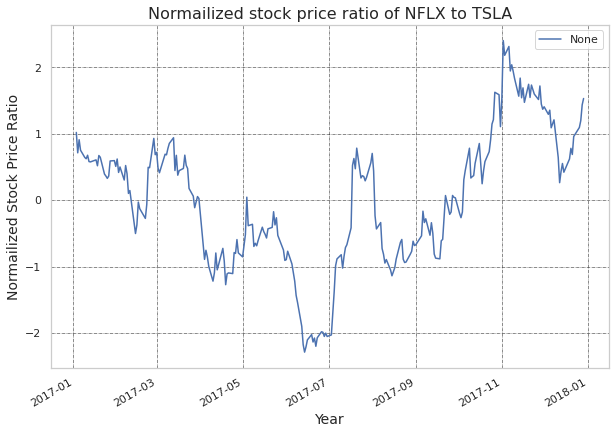

In [ ]:
z_scores.plot(figsize=(10, 7))

plt.legend()

plt.title("Normailized stock price ratio of NFLX to TSLA", fontsize=16)

plt.ylabel('Normailized Stock Price Ratio', fontsize=14)
plt.xlabel('Year', fontsize=14)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()